In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

# Now you can use absolute imports
from src.utils.data_processing import load_data, preprocess_data
from src.utils.defaults import DEFAULTS, DIAMETER_DICT, THICKNESS_DICT, FLOWRATE_DICT, TEMPERATURE_DICT

In [ ]:
import pandas as pd
from pathlib import Path

data_path = Path.cwd().parent / 'data' / 'multi_pressure' / 'S4R3.xlsx'
exp_data = pd.read_excel(data_path)

In [ ]:
exp = 'S4R3'
processed_data = preprocess_data(
    data=exp_data, 
    temperature= TEMPERATURE_DICT[exp],
    thickness= THICKNESS_DICT[exp], 
    flowrate= FLOWRATE_DICT[exp],
    diameter= DIAMETER_DICT[exp])

processed_data = processed_data[['time', 'flux', 'yCO2_bl', 'pressure']]

In [ ]:
# Function to identify steady-state region
def identify_steady_state_region(df, column='yCO2_bl', eps=0.001, window=10):
    slopes = df[column].diff() / df["time"].diff()
    df["slope_change_mean"] = slopes.diff().abs().rolling(window=window).mean()
    df["slope_change_min"] = slopes.diff().abs().rolling(window=window).min()
    df["slope_change_max"] = slopes.diff().abs().rolling(window=window).max()

    # find steady state region
    df["steady_state"] = df["slope_change_mean"] < eps
    # df["pct_change_mean"] = (
    #     (df[column].diff() / df["time"].diff())
    #     .pct_change()
    #     .abs()
    #     # .rolling(window=window)
    #     # .mean()
    # )
    # df["pct_change_min"] = (
    #     (df[column].diff() / df["time"].diff())
    #     .pct_change()
    #     .abs()
    #     .rolling(window=window)
    #     .min()
    # )
    # df["pct_change_max"] = (
    #     (df[column].diff() / df["time"].diff())
    #     .pct_change()
    #     .abs()
    #     .rolling(window=window)
    #     .max()
    # )
    # df["pct_change_median"] = (
    #     (df[column].diff() / df["time"].diff())
    #     .pct_change()
    #     .abs()
    #     .rolling(window=window)
    #     .median()
    # )
    return df


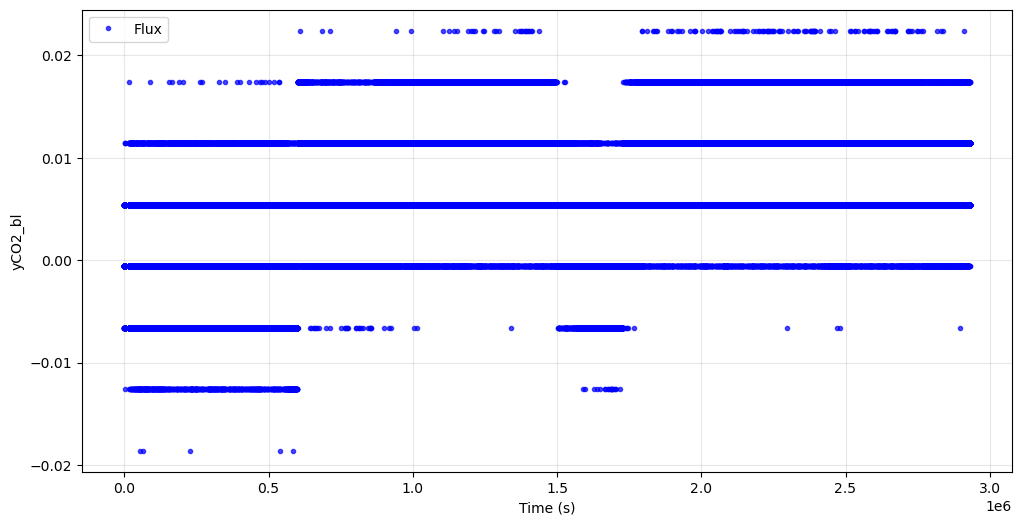

In [ ]:
processed_data_copied = processed_data.copy()
processed_data_copied = identify_steady_state_region(processed_data_copied, column='yCO2_bl', eps=0.01, window=10)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(processed_data_copied['time'], processed_data_copied['yCO2_bl'], 'b.', alpha=0.7, label='Flux')

# Highlight steady state regions
steady_state_data = processed_data_copied[processed_data_copied['steady_state'] == True]
# plt.plot(steady_state_data['time'], steady_state_data['yCO2_bl'], c='red', s=1, alpha=0.8, label='Steady State')

plt.xlabel('Time (s)')
plt.ylabel('yCO2_bl')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()